In [184]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor
import pymc
np.set_printoptions(suppress=True)

from sklearn.model_selection import train_test_split

In [185]:
def load_data(model):

    params = np.loadtxt('rupturemodel_'+model+'_4.txt', delimiter = ',')

    m = params.shape[0]
    n = params.shape[1]-1
    # changed so that y is the first column
    y = params[:,0]
    # changed params
    params = params[:,1:n+1]
    params[:,1600] = params[:,1600]/1601.
    #print (params[1:10,1598])
    return m, n, params, y

In [186]:
m, n, params, y = load_data('oct09')
print(params.shape)
#print(params[3,1:10])

(2617, 1607)


In [187]:
print (params[0,1599])

0.718037472709


In [188]:
train_mean = np.mean(params, axis=0)
train_std = np.std(params, axis=0)

# normalize the parameters for the training data file

params = params-train_mean
params = params/train_std

In [189]:
print(train_mean[4])

0.00136970493021


In [190]:
X_train, X_test, y_train, y_test = train_test_split(params, y, test_size=0.30, random_state=42)



In [191]:
clf = MLPRegressor(hidden_layer_sizes = [10,10,10, 10],
                             activation = 'relu',
                             alpha = 5.0,
                             solver = 'lbfgs').fit(X_train, y_train)

#solver = adam

In [192]:
y_predict_output = clf.predict(X_test)

In [193]:
from scipy import stats

line2 = 1.0*y_test

Accuracy of NN regressor on test set: 0.72
Accuracy of NN regressor on train set: 0.80


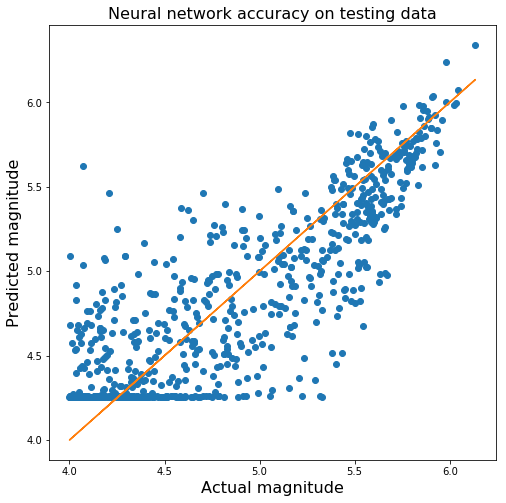

In [194]:
fig, ax = plt.subplots(figsize=(8,8))

plt.xlabel('Actual magnitude', fontsize = 16)
plt.ylabel('Predicted magnitude', fontsize = 16)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_predict_output)
line = slope*y_test+intercept

plt.plot(y_test,y_predict_output,'o', y_test, line2)
plt.title('Neural network accuracy on testing data', fontsize = 16)

print('Accuracy of NN regressor on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print('Accuracy of NN regressor on train set: {:.2f}'
     .format(clf.score(X_train, y_train)))

In [195]:
from sklearn.decomposition import PCA

In [196]:
my_model = PCA(10)  # project from data shape to 10 dimensions
roughness_data= params[:,0:1599]
print(roughness_data.shape)
projected = my_model.fit_transform(roughness_data)
#print(roughness_data.shape)
print(projected.shape)
print (my_model.explained_variance_ratio_)
print (my_model.explained_variance_ratio_.cumsum())

(2617, 1599)
(2617, 10)
[ 0.56750204  0.2585741   0.05692795  0.04617454  0.01727403  0.01639102
  0.00774029  0.00672676  0.00391277  0.00356194]
[ 0.56750204  0.82607614  0.88300409  0.92917863  0.94645266  0.96284367
  0.97058397  0.97731073  0.9812235   0.98478544]


In [197]:
params_other_than_rougness= params[:,1599::]
params_all_with_pca= np.concatenate((projected, params_other_than_rougness), axis=1)
print (params_all_with_pca.shape)

(2617, 18)


In [198]:
X_train, X_test, y_train, y_test = train_test_split(params_all_with_pca, y, test_size=0.30, random_state=42)


clf = MLPRegressor(hidden_layer_sizes = [10,10,10, 10],
                             activation = 'relu',
                             alpha = 5.0,
                             solver = 'lbfgs').fit(X_train, y_train)



In [199]:
y_predict_output = clf.predict(X_test)

In [200]:
from scipy import stats

line2 = 1.0*y_test

Accuracy of NN regressor on test set: 0.70
Accuracy of NN regressor on train set: 0.76


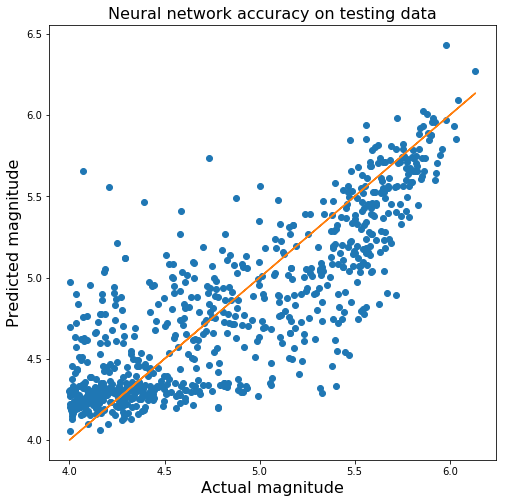

In [201]:
fig, ax = plt.subplots(figsize=(8,8))

plt.xlabel('Actual magnitude', fontsize = 16)
plt.ylabel('Predicted magnitude', fontsize = 16)
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test, y_predict_output)
line = slope*y_test+intercept

plt.plot(y_test,y_predict_output,'o', y_test, line2)
plt.title('Neural network accuracy on testing data', fontsize = 16)

print('Accuracy of NN regressor on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print('Accuracy of NN regressor on train set: {:.2f}'
     .format(clf.score(X_train, y_train)))